In [7]:
import random
import numpy as np
import math

from deap import base
from deap import creator
from deap import tools
from deap import algorithms

IND_INIT_SIZE = 50
NBR_CITIES = 25

tours = []
for i in range(IND_INIT_SIZE):    
    tours.append(random.sample(list(range(NBR_CITIES)),NBR_CITIES))
    
creator.create("Fitness", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.Fitness)

toolbox = base.Toolbox()

toolbox.register("attr_seq", random.sample, range(NBR_CITIES),NBR_CITIES)

toolbox.register("individual", tools.initIterate, creator.Individual, 
    toolbox.attr_seq)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalTSP(individual):
    distance = 0
    
    distanceX = -1
    distanceY = -1
    for i in range(len(individual)):
        index_city = individual[i]
        if (i==0):
            index_city_first = index_city
            index_city_prev = index_city
            distanceX = 0
            distanceY = 0
        else:
            distanceX = abs(cities[index_city][0]-cities[index_city_prev][0])
            distanceY = abs(cities[index_city][1]-cities[index_city_prev][1])
            index_city_prev = index_city
        distance += math.sqrt((distanceX**2) + (distanceY**2))
        if (i==len(individual)-1):
            distanceX = abs(cities[index_city_first][0]-cities[index_city][0])
            distanceY = abs(cities[index_city_first][1]-cities[index_city][1])
            distance += math.sqrt((distanceX**2) + (distanceY**2))
    #print(individual)
    return 1/distance,
    
toolbox.register("evaluate", evalTSP)
toolbox.register("mate",tools.cxPartialyMatched) #cxOrdered)
toolbox.register("mutate",tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select",tools.selTournament,tournsize=3)

In [8]:
def main():
    pop = toolbox.population(n=25)
    hof = tools.HallOfFame(1,np.array_equal)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.3, ngen=2500, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

In [14]:
# create a list of cities at random locations in a 100x100 matrix
cities = {}
for i in range(NBR_CITIES):
    cities[i] = (random.randint(0,100),random.randint(0,100))

In [15]:
pop, log, hof = main()

gen	nevals	avg        	min        	max       
0  	25    	0.000699863	0.000628466	0.00078255
1  	18    	0.000723762	0.000644906	0.000839051
2  	25    	0.000769892	0.00066716 	0.000908021
3  	18    	0.000774403	0.000592313	0.000901362
4  	18    	0.000816166	0.000659277	0.000901362
5  	20    	0.000838142	0.000631128	0.000936386
6  	23    	0.000874498	0.000694007	0.000936386
7  	25    	0.000883905	0.000705923	0.000969678
8  	20    	0.000910586	0.000760189	0.000961742
9  	22    	0.000911905	0.000726372	0.000961742
10 	15    	0.000934987	0.000706664	0.00100172 
11 	20    	0.000947099	0.000778129	0.00101    
12 	19    	0.000947524	0.000760155	0.00102424 
13 	19    	0.000970492	0.000688348	0.00106199 
14 	22    	0.000994096	0.000813393	0.00110962 
15 	23    	0.000979473	0.000734413	0.00110962 
16 	18    	0.0010224  	0.000916022	0.00113872 
17 	20    	0.00104834 	0.000858493	0.00113872 
18 	20    	0.00108028 	0.00102148 	0.00117166 
19 	20    	0.00108076 	0.000829467	0.00117166 
20 	19    	0.00

[ 2 19  7  9 18 17  4  0 13  6 14 22 10 21 15 23  8  5 11 24  3  1 12 16 20]


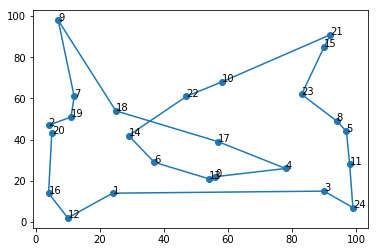

In [16]:
import matplotlib.pyplot as plt

plt.figure()
print(hof.items[0])
listXCoord = [cities[item][0] for item in hof.items[0]]
listYCoord = [cities[item][1] for item in hof.items[0]]

plt.scatter(listXCoord,listYCoord)
plt.plot(listXCoord,listYCoord)
for i in range(len(hof.items[0])):
    plt.annotate(hof.items[0][i],cities[hof.items[0][i]])
plt.show()
